<h1 align="center">STAT 5243 Project1</h1>

<p align="center">
</p>

## 1. Introduction and Data Description
House price prediction is really important and usual in our lives. In today’s life, house prices may be used to infer economic development and richness of people in specific areas. There is no doubt that various factors may affect house price. In this case, we are curious about which one contributes the most to house price, or the factors that have such a strong influence. As a result, it will be easier for house investors to decide whether or when to buy or sell. Furthermore, for real estate developers, they can make more scientific developments and increase their profit. For example, they may find better locations or design more popular structures. This dataset includes 20,640 samples. Each shows one block of houses. 10 variables, which median_house_value is the outcome variable showing the median value of the household prices of all the houses in the block. Districts or block groups are the smallest geographical units for which the US Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people). The 9 factors are longitude, latitude, house_median_age (median age of the house in the block), total_rooms (number of rooms of all houses excluding bedrooms), total_bedrooms (number of bedrooms of all houses), population, households, median_income (median of the total household income of all the houses in the block in thousand) and ocean_proximity (near bay, less than 1h, or inland). For these factors, only ocean_proximity is categorical, and the other 8 are numerical. 

## 2. Data acquisition methodology
Kaggle is an online platform and community for data science professionals and machine learning practitioners, operated by Google LLC. It allows us to discover and share datasets, develop and analyze models within a browser-based data science environment, collaborate with other data scientists and engineers, and participate in competitions designed to address real-world data science problems. We searched on Kaggle and found out that this dataset represents the house prices in California. In this case, we download the data and decide to use it. 






In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('C:/Users/eyuey/Desktop/课件/哥大/STAT5243GR/housing_raw.csv')
print('df shape:', df.shape)
df.head()

df shape: (20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


## 3. Cleaning and preprocessing steps

In [4]:
print(df.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64


In [5]:
print(f'\nShape: {df.shape}')
df = df.dropna()
print(f'\nShape after dropna: {df.shape}')
print(df.isnull().sum())


Shape: (20640, 10)

Shape after dropna: (20433, 10)
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64


In [6]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.info()

<class 'pandas.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  int64  
 3   total_rooms         20433 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  int64  
 6   households          20433 non-null  int64  
 7   median_income       20433 non-null  float64
 8   ocean_proximity     20433 non-null  str    
 9   median_house_value  20433 non-null  int64  
dtypes: float64(4), int64(5), str(1)
memory usage: 1.9 MB


In [9]:
print("Unique Values of ocean_proximity:",df["ocean_proximity"].unique())

Unique Values of ocean_proximity: <ArrowStringArray>
['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND']
Length: 5, dtype: str


In [10]:
df.info()

<class 'pandas.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  int64  
 3   total_rooms         20433 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  int64  
 6   households          20433 non-null  int64  
 7   median_income       20433 non-null  float64
 8   ocean_proximity     20433 non-null  str    
 9   median_house_value  20433 non-null  int64  
dtypes: float64(4), int64(5), str(1)
memory usage: 1.9 MB


In [11]:
df['all_rooms_amount'] = df['total_rooms'] + df['total_bedrooms']
df = df.drop(columns=['longitude','total_rooms','total_bedrooms'])


By careful viewing of the dataset, we discovered that variable longitude is not such meaningful to house price. It is no doubt that longitude does not necessarily affect the climate of the blocks. By contrast, latitude may have some influence, which higher latitude may cause lower average temperature. In this case, we deleted the variable longitude but preserved latitude. At the same time, the variable total_rooms and total_bedrooms explain the same thing, which is the number of rooms in the block of houses. Combining these two variables will be better. Since total_rooms represented the room amount without the bedroom, we decided to add the value of total_rooms and total_bedrooms so that it merged to a new variable all_rooms_amount. This represented the total number of all rooms (both bedrooms and other kinds of) in the block of houses. NAs also appeared, so we did NA removal and finally formed the cleaned dataset.

## 4. Exploratory Data Analysis (EDA)

First of all, in order to make a quick view of the whole cleaned dataset, we did summary statistics which shown below:


In [49]:
df.describe()

,latitude,housing_median_age,population,households,median_income,median_house_value,all_rooms_amount,log_median_house_value
count,17001.000000,17001.000000,17001.000000,17001.000000,17001.000000,17001.000000,17001.000000,17001.000000
mean,35.699516,29.641139,1174.153344,406.455267,3.555116,184948.614552,2519.322863,11.998236
std,2.168654,12.189469,581.081840,193.647151,1.434783,91711.311756,1204.087432,0.526179
min,32.540000,1.000000,3.000000,2.000000,0.499900,14999.000000,4.000000,9.615739
25%,33.940000,19.000000,760.000000,269.000000,2.470600,112500.000000,1661.000000,11.630709
50%,34.320000,30.000000,1098.000000,382.000000,3.371500,168800.000000,2360.000000,12.036470
75%,37.740000,38.000000,1528.000000,529.000000,4.454500,239600.000000,3283.000000,12.386726
max,41.950000,52.000000,3121.000000,987.000000,8.028700,458300.000000,5876.000000,13.035279


As we firstly look at our outcome variable median_house_value, it is clear that the mean is 206864.41 and standard deviation is 115435.67, which shows that the differences of median house price in these blocks and areas are really obvious. The absolute value of difference between max and min is about 485,000, which is a large number. Furthermore, the standard deviation of population is also really high, which exceeds 1130. We can see that the population of different blocks are really different. 

Since we want to view median_house_value more straightforwardly, we created a histogram which shows the distribution of median house price. You can see it below:


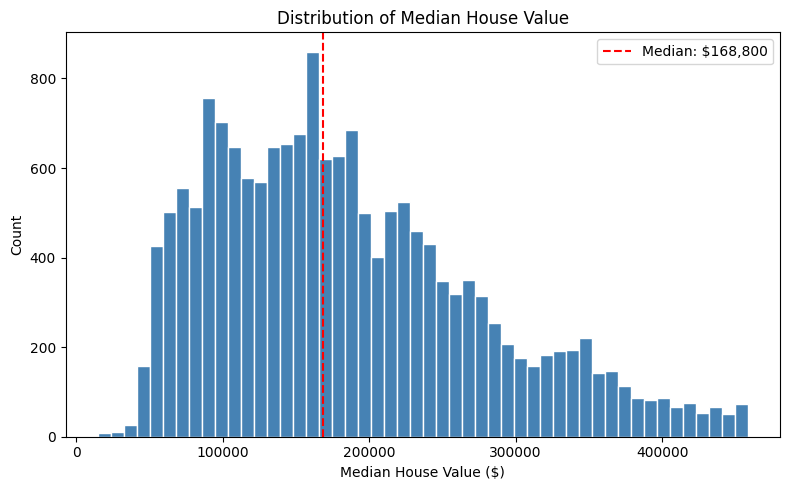

In [34]:
def plot_house_value_histogram(df):
    plt.figure(figsize=(8, 5))
    plt.hist(df["median_house_value"], bins=50, color="steelblue", edgecolor="white")
    plt.title("Distribution of Median House Value")
    plt.xlabel("Median House Value ($)")
    plt.ylabel("Count")
    plt.axvline(df["median_house_value"].median(), color="red", linestyle="--",
                label=f"Median: ${df['median_house_value'].median():,.0f}")
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_house_value_histogram(df)

There is no doubt that the distribution is non-normal and obviously right-skewed. The majority of the observations are below 300,000. However, there are a few observations above 400,000 which can be considered as outliers. The median value of median house value is $168,000, which is lower than the average value $206,864 which shown above on the table. 

Furthermore, we want to understand the relationship between numerical factors and the house price. Plotting scatterplots is a good idea. 


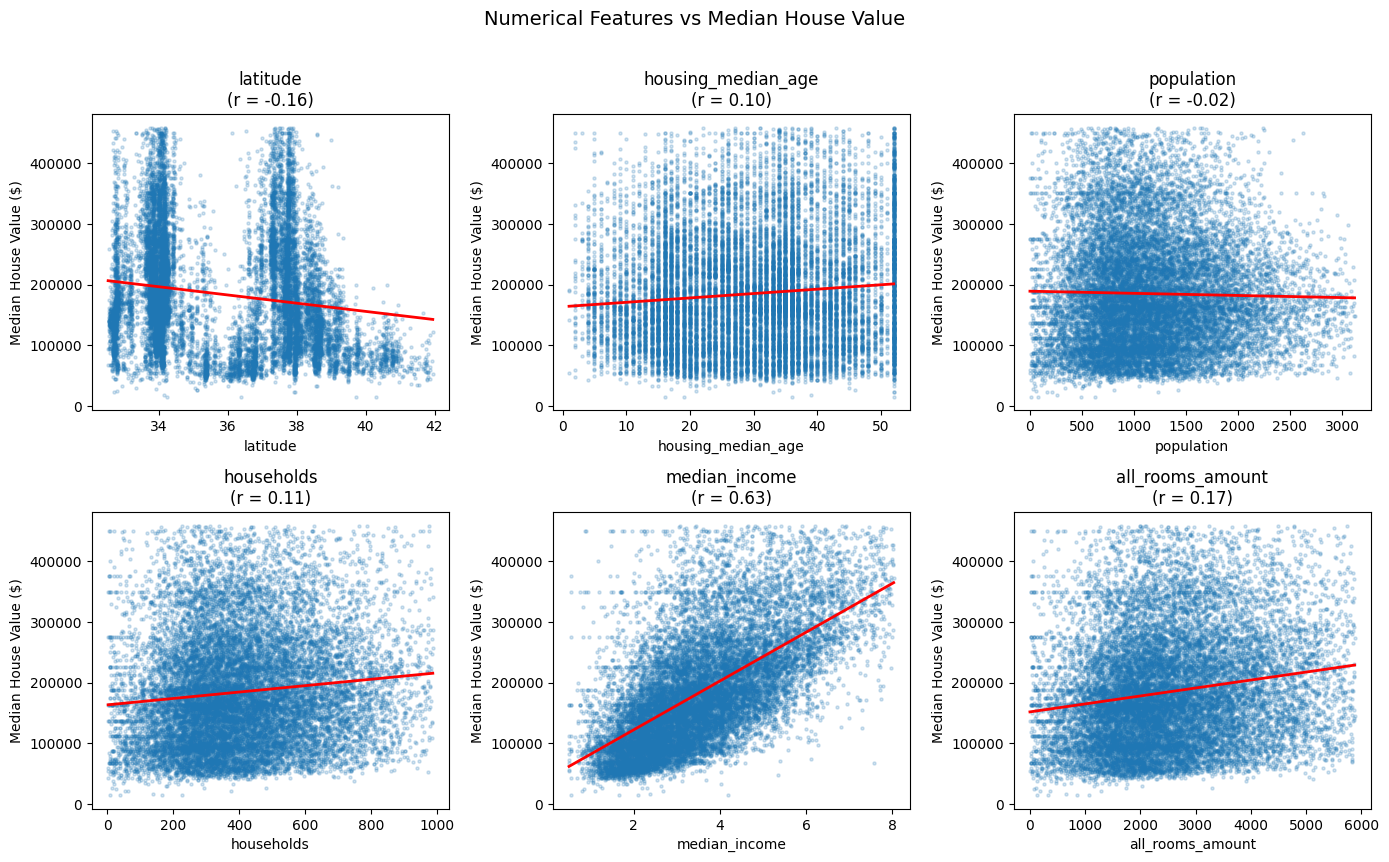

In [36]:
import numpy as np
import matplotlib.pyplot as plt

def plot_numerical_vs_price(df):
    num_cols = ["latitude", "housing_median_age", "population", 
                "households", "median_income", "all_rooms_amount"]

    fig, axes = plt.subplots(3, 3, figsize=(14, 12))
    axes = axes.flatten()

    for i, col in enumerate(num_cols):
        x = df[col]
        y = df["median_house_value"]

        # scatter
        axes[i].scatter(x, y, alpha=0.2, s=5)

        # Redline
        slope, intercept = np.polyfit(x, y, 1)
        x_vals = np.linspace(x.min(), x.max(), 100)
        y_vals = slope * x_vals + intercept
        axes[i].plot(x_vals, y_vals, color='red', linewidth=2)

        corr = x.corr(y)

        axes[i].set_title(f"{col}\n(r = {corr:.2f})")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Median House Value ($)")

    for j in range(len(num_cols), len(axes)):
        axes[j].set_visible(False)

    plt.suptitle("Numerical Features vs Median House Value", fontsize=14, y=1.01)
    plt.tight_layout()
    plt.show()

plot_numerical_vs_price(df)

As we see these plots, except median_income, many of the points are far from the regression line. We may infer that only income has a linear relationship with house price, but others violate linearity assumption. Furthermore, the slope of the regression line in median_income plot is the most obvious. It turns out that income seems to be the most important factor which contributed to house price in all numerical factors. With higher median income in the specific block, the median house price will be higher. At the same time, households, housing_median_age and all_rooms_amount have upward sloping regression lines, which shows the direct ratio between house median price and these factors. On the contrary, variable latitude has a downward sloping regression line. It means the higher latitude, the lower median house price. 

We also have to understand the comparison of house prices in different ocean proximity areas. Therefore, we plot boxplot by different categories of ocean proximity:

C:\Users\eyuey\AppData\Local\Temp\ipykernel_5952\399246052.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="ocean_proximity", y="median_house_value",


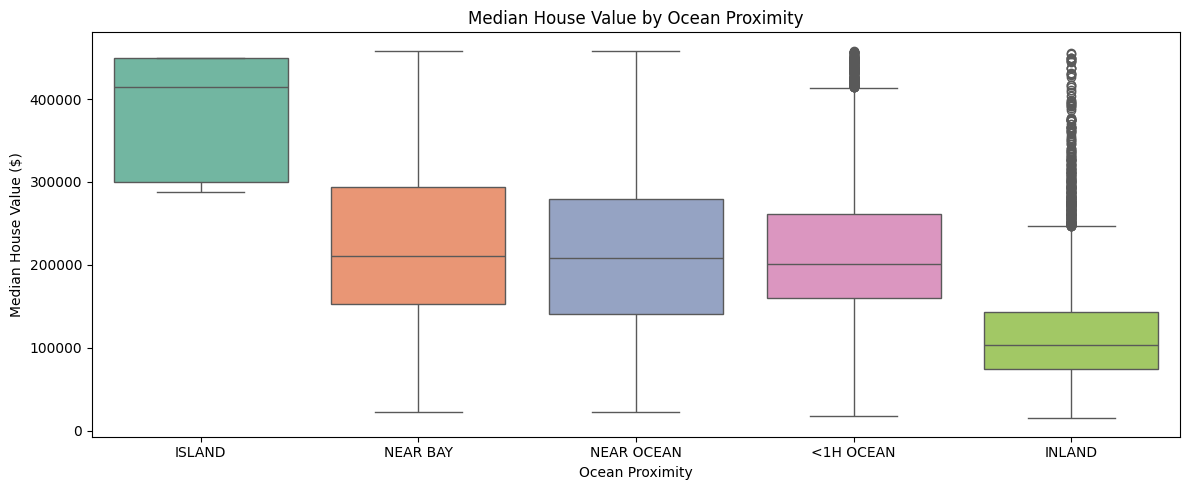

In [38]:
def plot_categorical_boxplot(df):
    order = (df.groupby("ocean_proximity")["median_house_value"]
               .median()
               .sort_values(ascending=False)
               .index.tolist())

    plt.figure(figsize=(12, 5))
    sns.boxplot(data=df, x="ocean_proximity", y="median_house_value",
                order=order, palette="Set2")
    plt.title("Median House Value by Ocean Proximity")
    plt.xlabel("Ocean Proximity")
    plt.ylabel("Median House Value ($)")
    plt.tight_layout()
    plt.show()

plot_categorical_boxplot(df)


It is no doubt that the median house price located on the island is the highest, which is much higher than other categories. By contrast, inland houses tended to be the cheapest, with the lowest median value of house price. Furthermore, near the bay, near the ocean and <1h ocean have similar median values. We may infer that the houses near the coast, even on islands, have good views and a moist atmosphere, so that causes a better quality of life. This leads to higher price in near coast areas compared to inland. 

In [39]:
## Feature Engineering

## 5. Feature Engineering
## A. Log-transformation of Y
From the histogram in EDA, we learned that the outcome variable median_house_value is right skewed and non-normal. We also checked out the residuals by creating QQ plot shown below:


In [40]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


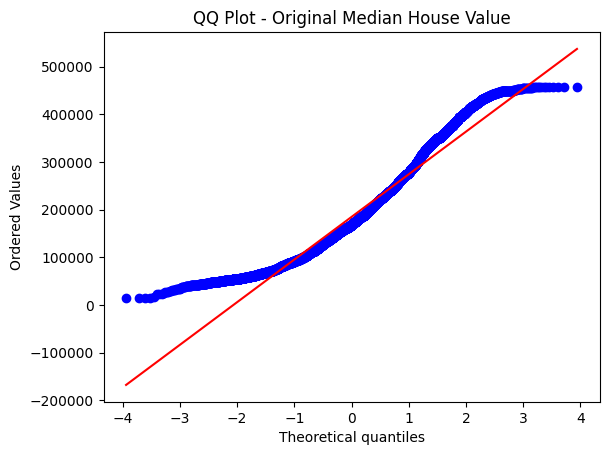

In [42]:
df.columns = df.columns.str.strip()
plt.figure()
stats.probplot(df["median_house_value"], dist="norm", plot=plt)
plt.title("QQ Plot - Original Median House Value")
plt.show()

It is clear that the plot shows strong curvature and  heavy right tails, indicating non-normal residuals that reflect the right-skewed distribution of the raw median house value data. There are many points far from the red line. As the normal-distribution assumption fails, we have to do log-transformation to make a remedy. It will fix the issue with a right-skewed target feature so that the distribution will be visually more “normal.” After transformation, we plot the QQ plot again which shown below:


In [44]:
import numpy as np

# If your dataframe is called df
df["log_median_house_value"] = np.log(df["median_house_value"])

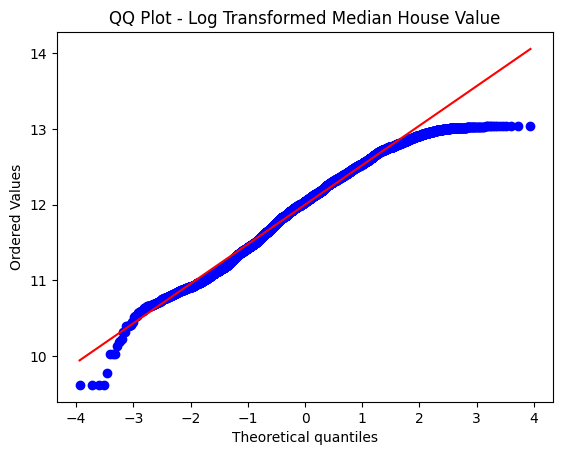

In [46]:
plt.figure()
stats.probplot(df["log_median_house_value"], dist="norm", plot=plt)
plt.title("QQ Plot - Log Transformed Median House Value")
plt.show()

We can see that points align much more closely to the red line, and strong curvature has largely disappeared. It means that the right skewed and high-tailed problem improved a lot. The distribution seems to be much more normal than without transformation. These phenomena show that log-transformation is indispensable in our analysis. 


## B. Encoding Categorical Variables 
Since we have categorical variable ocean_proximity in our dataset, regression models cannot make interpretation directly. However, ocean proximity categories do not have a true numeric ranking. Therefore, direct integer encoding would introduce artificial relationships and bias the model. In this case, we decide to use one-hot encoding. Each category was converted into a binary indicator variable. To avoid multicollinearity in the regression model, one category was omitted and used as the reference group. The resulting dummy variables allow the model to estimate the effect of each location type relative to the baseline category. Each row has 1 which shows the observation belongs to a specific category and 0 otherwise. 


In [48]:
df.columns = df.columns.str.strip()
cat_col = "ocean_proximity"  
df_encoded = pd.get_dummies(df, columns=[cat_col], drop_first=True, dtype=int)
print(df_encoded.filter(like=cat_col).head())

   ocean_proximity_INLAND  ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
2                       0                       0                         1   
3                       0                       0                         1   
4                       0                       0                         1   
5                       0                       0                         1   
6                       0                       0                         1   

   ocean_proximity_NEAR OCEAN  
2                           0  
3                           0  
4                           0  
5                           0  
6                           0  


## 6. Summary of Key Findings

This study investigated the determinants of median house value across California census block groups using exploratory data analysis and feature engineering techniques.

First, exploratory data analysis suggests that **`median_income`** is the most influential numerical predictor of house prices. Among all numerical variables, it shows the strongest positive linear relationship with **`median_house_value`**, consistent with the steepest fitted trend in the scatterplot grid.

Second, geographic characteristics matter. **`latitude`** shows an overall negative association with house prices, indicating that block groups at higher latitudes tend to have lower median house values. In addition, **`ocean_proximity`** plays an important role. From the boxplot analysis, block groups located on **ISLAND** have the highest median values, while **INLAND** areas tend to have significantly lower prices, supporting the idea that coastal amenities and environmental advantages are capitalized into housing values.

Third, the response variable exhibits strong right-skewness. The initial QQ plot shows heavy tails and curvature, indicating non-normality that violates classical linear regression assumptions. After applying a log-transformation to **`median_house_value`**, the QQ plot aligns more closely with the theoretical normal line, suggesting improved distributional properties for regression modeling.

Finally, feature engineering steps—including combining room-related variables and one-hot encoding for **`ocean_proximity`**—prepare the dataset for more reliable regression estimation and interpretation.

Overall, income level and coastal proximity emerge as the most salient determinants of housing prices, while transformation and encoding steps improve statistical validity for subsequent modeling.

## 7. Challenges Faced and Future Recommendations

### Challenges Faced

**1) Non-normal distribution of the response variable**  
The strong right-skewness of `median_house_value` initially violates normality assumptions commonly used for regression diagnostics and inference, motivating transformation and additional checks.

**2) Potential multicollinearity among predictors**  
Several predictors are conceptually related (e.g., population/households and room-related measures), which may introduce multicollinearity and reduce coefficient interpretability. Additional diagnostics (e.g., VIF) were not conducted in this analysis.

**3) Linearity assumption limitations**  
Except for `median_income`, many predictors show weak linear patterns, suggesting that a purely linear model may not capture complex relationships in the housing market.

**4) Feature selection decisions**  
Removing `longitude` was based on conceptual reasoning rather than empirical feature selection methods, and a more systematic approach could strengthen justification.

### Future Recommendations

**1) Build predictive models and compare performance**  
Estimate a multiple regression model and evaluate predictive performance using metrics such as RMSE/MAE and $R^2$. Compare results between raw and log-transformed targets to quantify improvements.

**2) Consider non-linear models**  
Because several predictors appear non-linear, models such as Random Forest, Gradient Boosting, or Neural Networks may better capture complex structure and interactions.

**3) Investigate interaction effects**  
Test interaction terms (e.g., `median_income` × `ocean_proximity`) to assess whether socioeconomic factors modify geographic effects.

**4) Spatial analysis**  
Use geographic visualization or spatial regression approaches to better model location-driven clustering in housing prices.

**5) Outlier treatment**  
Consider robust regression, trimming/winsorization, or explicit outlier diagnostics to reduce the influence of extreme price observations.

## References

[1] Shibu Mohapatra. *House Price* dataset. Kaggle. https://www.kaggle.com/datasets/shibumohapatra/house-price (accessed Feb 2026).

## Link
https://github.com/louis122003/STAT5243-Project-1.git